In [0]:
from fastai.text import *

In [2]:
path=untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [3]:
df=pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [4]:
df['text'][0]

"Un-bleeping-believable! Meg Ryan doesn't even look her usual pert lovable self in this, which normally makes me forgive her shallow ticky acting schtick. Hard to believe she was the producer on this dog. Plus Kevin Kline: what kind of suicide trip has his career been on? Whoosh... Banzai!!! Finally this was directed by the guy who did Big Chill? Must be a replay of Jonestown - hollywood style. Wooofff!"

In [5]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

In [6]:
data.train_ds[0][0].data[:10]

array([   2,    5, 4619,   25,    0,   25,  867,   52,    5, 3776])

In [8]:
path=untar_data(URLs.IMDB)
path.ls()

A new version of the dataset is available.


[PosixPath('/root/.fastai/data/imdb/test'),
 PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/unsup'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/train')]

In [9]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/neg'),
 PosixPath('/root/.fastai/data/imdb/train/pos'),
 PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat')]

**Language model**

In [10]:
data_lm=(TextList.from_folder(path)
.filter_by_folder(include=['train','test','unsup'])
.split_by_rand_pct(0.1)
.label_for_lm()
.databunch(bs=48)
)

In [11]:
data_lm.show_batch()

idx,text
0,his performance is very ordinary and he ca n't carry it off like xxmaj carey did . \n \n xxmaj the one good thing about this is i only paid $ 1.95 to rent it . xxmaj it 's a movie for children ... very young children who have only seen about 4 films or so in their short lives . \n \n xxmaj it 's interesting to
1,. xxmaj one for xxmaj sybil and another for trying to pass off xxmaj linda xxmaj blair as a sex symbol . xxmaj whatever could have possessed them ( get it ? ) ? xxbos xxmaj the hero xxmaj john xxmaj keem is going after some drug dealers who kidnaps girls for some reason . xxmaj on his journey he uses karate and kung fu moves and i do n't
2,"falls for an incredibly weird werewolf - looking guy living in the apartment upstairs ? xxmaj set in the early 1970 's , xxmaj manhattan was a virtual magnet for freaks and weirdo 's of all sizes and shapes , most not looking like human hairballs ; so why is this affair worthy of a 122 minute movie ? \n \n xxmaj robert xxmaj downey xxmaj jr used to"
3,"their investigation of smuggler and all around mean guy xxmaj vargas is being televised , why the heck has n't someone mentioned to him that they are on his trail ? xxmaj then again , given this villain 's actions maybe i should n't be surprised ; this is the same joker who is very angry at an associate for using his new xxunk without approval , jeopardizing a deal"
4,", but the end result is just awful . \n \n xxmaj unfortunately for me , as a horror fan , the cover of this movie looks very good and it immediately caught my interest , which is the main reason that i was tricked into watching it . i assure you that this is not a quality horror movie . xxmaj it is a disturbing yet boring attempt"


In [12]:
learn=language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

In [13]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


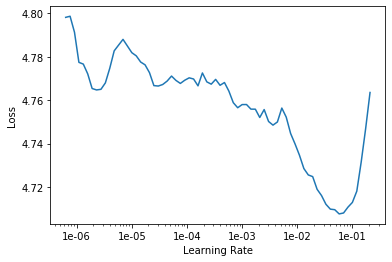

In [14]:
learn.recorder.plot(skip_end=20)

In [15]:
learn.fit_one_cycle(2, max_lr=slice(1e-02), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.357688,4.176524,0.281504,26:25
1,4.181896,4.023320,0.295491,26:25


In [0]:
learn.save('fit_head')

In [0]:
learn.unfreeze()

In [18]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


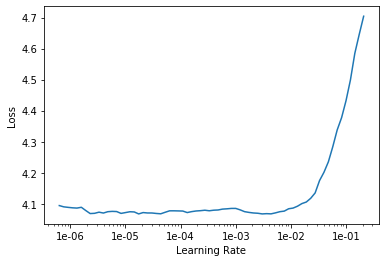

In [21]:
learn.recorder.plot(skip_end=20)

In [22]:
learn.fit_one_cycle(5, 1e-03, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.916669,3.844434,0.314445,26:42
1,3.878253,3.797381,0.321458,26:41
2,3.813071,3.745736,0.327538,26:43
3,3.761613,3.709859,0.331768,26:42
4,3.703157,3.699737,0.333077,26:45


In [0]:
learn.save('fine_tuned')

In [0]:
TEXT1= "I liked this movie because"
TEXT2="The movie is bad because"
N_WORDS = 10


In [46]:
print(learn.predict(TEXT1, N_WORDS,temperature=0.75))

I liked this movie because it 's about the rep who 's got a hand


In [47]:
print(learn.predict(TEXT2, N_WORDS, temperature=0.75))


The movie is bad because the scenery is awful , the lighting is terrible ,


In [0]:
learn.save_encoder('finetuned_enc')

**Sentiment analysis**

In [0]:
data=untar_data(URLs.IMDB)

In [50]:
data_clas=(TextList.from_folder(path, vocab=data_lm.vocab)
          .split_by_folder(valid='test')
          .label_from_folder(classes=['neg','pos'])
          .databunch(bs=42))


In [57]:
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxmaj some have praised _ xxunk _ as a xxmaj disney adventure for adults . i do n't think so -- at least not for thinking adults . \n \n xxmaj this script suggests a beginning as a live - action movie , that struck someone as the type of crap you can not sell to adults anymore . xxmaj the "" crack staff "" of many older",neg
"xxbos xxmaj okay , so i 'm not a big video game buff , but was the game xxmaj house of the xxmaj dead really famous enough to make a movie from ? xxmaj sure , they went as far as to actually put in quick video game clips throughout the movie , as though justifying any particular scene of violence , but there are dozens and dozens of games",neg
"xxbos xxup myra xxup breckinridge is one of those rare films that established its place in film history immediately . xxmaj praise for the film was absolutely nonexistent , even from the people involved in making it . xxmaj this film was loathed from day one . xxmaj while every now and then one will come across some maverick who will praise the film on philosophical grounds ( aggressive feminism",neg
"xxbos xxmaj prior to this release , xxmaj neil labute had this to say about the 1973 original : "" xxmaj it 's surprising how many people say it 's their favorite soundtrack . i 'm like , come on ! xxmaj you may not like the new one , but if that 's your favorite soundtrack , i do n't know if i * want * you to like",neg


In [0]:
learn=text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

In [0]:
learn.load_encoder('finetuned_enc');

In [0]:
learn.freeze()

In [55]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


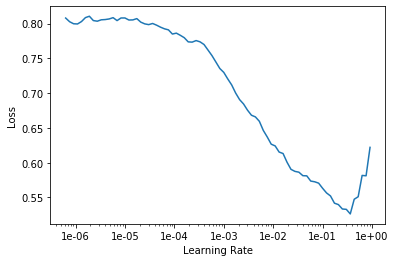

In [58]:
learn.recorder.plot()

In [59]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.342510,0.264951,0.892760,06:43


In [0]:
learn.save('first')

In [0]:
learn.freeze_to(-2)

In [62]:
learn.fit_one_cycle(2, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.300325,0.216305,0.912240,06:45
1,0.248346,0.195100,0.923400,06:45


In [0]:
learn.save('second')

In [0]:
learn.freeze_to(-3)

In [65]:
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.226842,0.177755,0.931120,06:55


In [0]:
learn.save('third')

In [0]:
learn.unfreeze()

In [68]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


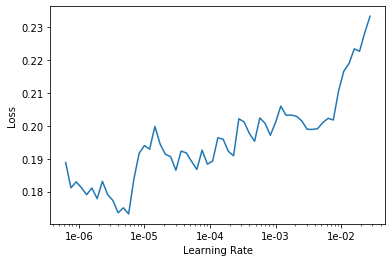

In [70]:
learn.recorder.plot(skip_end=20)

In [71]:
learn.fit_one_cycle(2, max_lr=slice(5e-06,9e-06),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.191424,0.184513,0.928680,06:10
1,0.200158,0.176605,0.932080,07:00


In [0]:
learn.save('new')

In [75]:
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.183194,0.179230,0.930160,06:40
1,0.179386,0.172066,0.932200,06:09


In [0]:
learn.save('max')

In [83]:
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.153260,0.177923,0.931600,07:02
1,0.162643,0.168794,0.934640,06:26
2,0.126977,0.169826,0.934520,06:38


In [0]:
learn.save('stage1')

In [0]:
learn.load('stage1');

In [88]:
cat,blah,blahh=learn.predict("It was an amazing film")
cat

Category pos

In [89]:
cat,blah,blahh=learn.predict("Worst movie ever")
cat

Category neg